In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
#importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [3]:
#reading the CSV file
x = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')

#displaying the dataframe
x

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
#dataset size - 5572 rows x 5 columns
x.shape

(5572, 5)

In [5]:
#printing the concise summary of the dataset
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#column 2, 3, 4 have majority missing values, so it is better to drop them.
x.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

#displaying the edited dataframe
x

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
#renaming the column names to a better and meaningful column name
x.rename(columns = {'v1':'result', 'v2':'input'}, inplace=True)

#displaying the edited dataframe
x

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
encoder = LabelEncoder()
x['result'] = encoder.fit_transform(x['result'])

#displaying the edited dataframe
x.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#check if there is any NULL value
x.isnull().sum()

result    0
input     0
dtype: int64

In [10]:
#check if there is any DUPLICATE values
x.duplicated().sum()

403

In [11]:
#the dataset has DUPLICATE values, so we will have to REMOVE them
x = x.drop_duplicates(keep='first')

#displaying the edited dataframe
x

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
#checking the number of SPAM vs not SPAM messages
x['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

In [13]:
653*100.0/5169

12.633004449603405

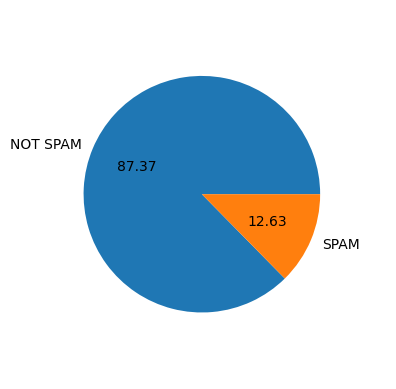

In [14]:
#for better representation, we can use PIE CHART to represent it.
#PIE CHARTS can be created using matplotlib library

plt.pie(x['result'].value_counts(),  labels = ['NOT SPAM', 'SPAM'], autopct = '%0.2f', radius = 0.8)
plt.show()

In [15]:
#downloading the dependencies 
#punkt package includes pre-trained models for tokenizing text in many languages

nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#creating a new column with count of characters
x['countCharacters'] = x['input'].apply(len)

#creating a new column with count of words
x['countWords'] = x['input'].apply(lambda i:len(nltk.word_tokenize(i)))
#'word_tokenize' function takes a string of text as input and returns a list of words

#creating a new column with count of sentences
x['countSentences'] = x['input'].apply(lambda i:len(nltk.sent_tokenize(i)))
#'sent_tokenize' function takes a string of text as input and returns a list of sentences

/tmp/ipykernel_266/3785843795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['countCharacters'] = x['input'].apply(len)
/tmp/ipykernel_266/3785843795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['countWords'] = x['input'].apply(lambda i:len(nltk.word_tokenize(i)))
/tmp/ipykernel_266/3785843795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [17]:
#displaying the edited dataframe with the 3 new columns added
x.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
#extracting the 5 number summary of the 3 new column values
x[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [19]:
#for not SPAM
x[x['result'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [20]:
#for SPAM
x[x['result'] == 1][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='countCharacters', ylabel='Count'>

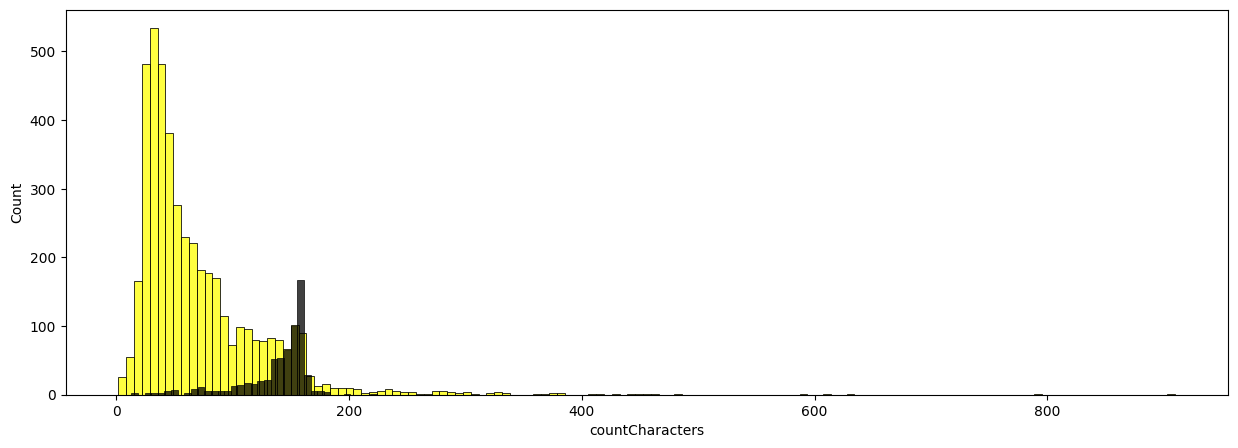

In [21]:
#for better visualization, we will plot a histogram using 'seaborn'
plt.figure(figsize = (15, 5))
sns.histplot(x[x['result'] == 0]['countCharacters'], color = "yellow")
sns.histplot(x[x['result'] == 1]['countCharacters'], color = "black")

#black -> SPAM, yellow -> not SPAM

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='countWords', ylabel='Count'>

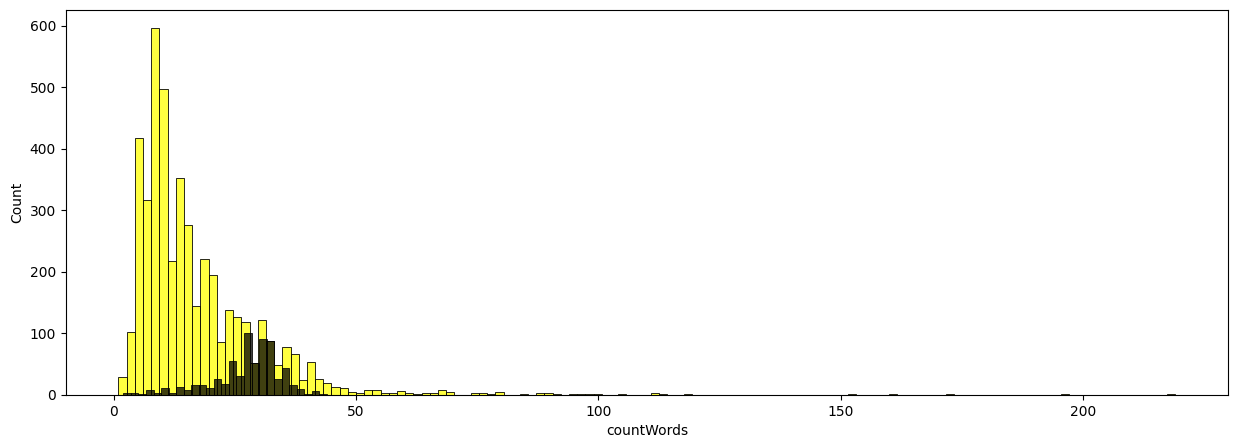

In [22]:
plt.figure(figsize = (15, 5))
sns.histplot(x[x['result'] == 0]['countWords'], color = "yellow")
sns.histplot(x[x['result'] == 1]['countWords'], color = "black")

#black -> SPAM, yellow -> not SPAM

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

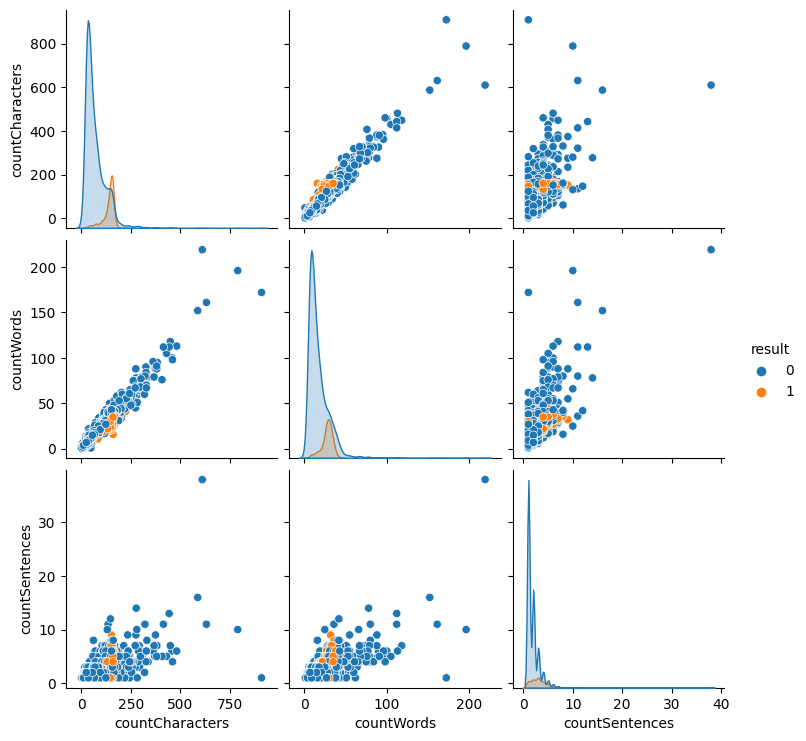

In [23]:
#finding relationship between the columns
sns.pairplot(x, hue='result')

In [24]:
#find pearson's correlation coefficient
x.corr(numeric_only=True)

,result,countCharacters,countWords,countSentences
result,1.000000,0.384717,0.264198,0.267602
countCharacters,0.384717,1.000000,0.965307,0.626118
countWords,0.264198,0.965307,1.000000,0.683561
countSentences,0.267602,0.626118,0.683561,1.000000


<Axes: >

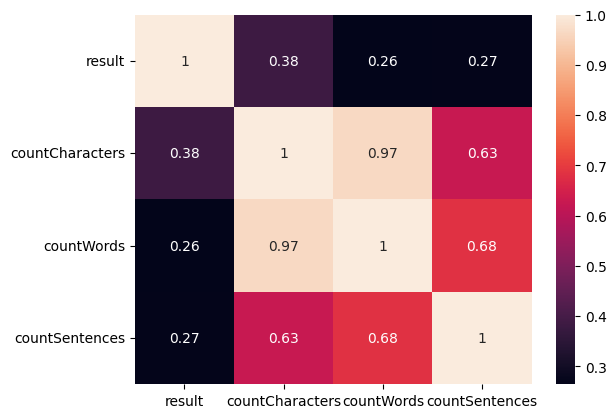

In [25]:
#converting it into a heatmap
sns.heatmap(x.corr(numeric_only=True), annot=True)

In [26]:
#downloading the package which contains the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
def transform_text (text):
    
    #converting to lower case
    text = text.lower()
    
    #tokenization
    text = nltk.word_tokenize(text)
    
    #removing special characters
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)
            
    #updating the text after removed special characters
    text = removedSC[:]
    
    #removing stop words and punctuation characters
    removedSWPC = list()
    for i in text:
        #stopwords.words('english') is a function of 'nltk', returns list of english stop words
        #string.punctuation is a part of 'string' module, containing the ASCII punctuation characters
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)
            
    #updating the text after removed stop words and punctuation characters
    text = removedSWPC[:]
    
    #stemming the data using 'PorterStemmer' algorithm.
    #nltk module provides this class to use.
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))
    
    text = stemmed[:]
    
    return " ".join(text)

In [28]:
#will create a new column to store the transformed text -> 'processed'
x['processed'] = x['input'].apply(transform_text)

#displaying the edited dataframe with a new column 'processed'
x.head()

/tmp/ipykernel_266/2432381459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['processed'] = x['input'].apply(transform_text)


,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [29]:
#will be creating word cloud for data visualization to display the most frequently occurring words in the processed dataset.
#using 'WordCloud' class

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

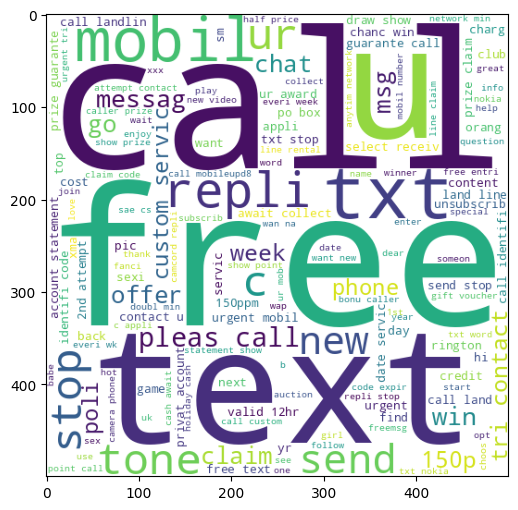

In [30]:
#creating a wordcloud for the SPAM messages
spamWC = wc.generate(x[x['result'] == 1]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

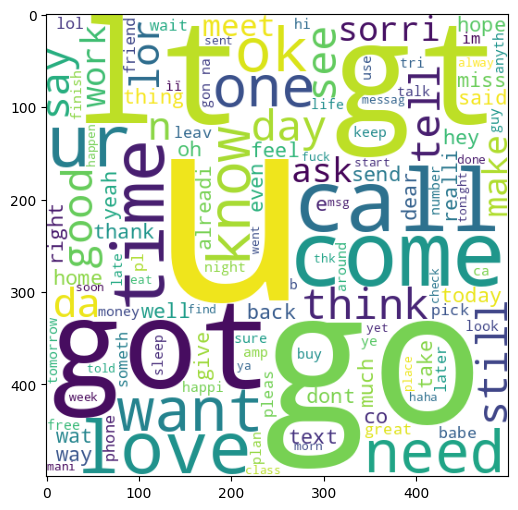

In [31]:
#creating a wordcloud for the not SPAM messages
spamWC = wc.generate(x[x['result'] == 0]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

In [32]:
#extracting all the words used in SPAM messages
spamWords = list()

for msg in x[x['result'] == 1]['processed'].tolist():
    for word in msg.split():
        spamWords.append(word)

spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [33]:
#to count the frequency of the words, we will be using the Counter class to create a dictionary
spamWordsDictionary = Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40)

[('call', 320),
 ('free', 189),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('4', 76),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('guarante', 42),
 ('messag', 40),
 ('per', 39),
 ('chat', 38),
 ('tri', 37),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('msg', 34)]

In [34]:
#converting this dictionary to a dataframe
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

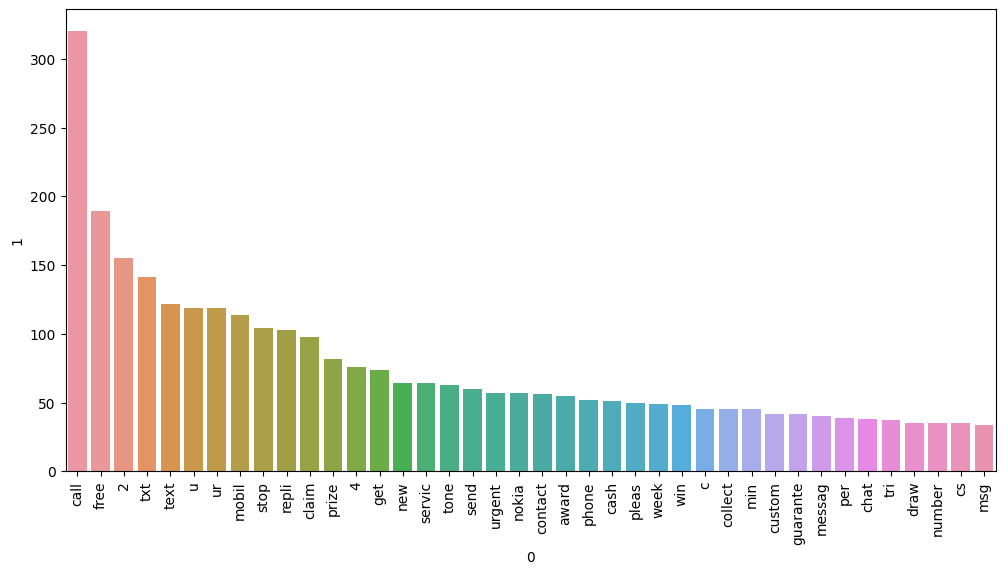

In [35]:
#plotting a bar plot of the mostCommonSPAM dataframe
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [36]:
#converting the collection of text into a matrix of token counts
cv = CountVectorizer()

In [37]:
#transforming the data of processed column
X = cv.fit_transform(x['processed']).toarray()

#printing size of X
X.shape

(5169, 6629)

In [38]:
#storing the values of the 'result' column
y = x['result'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [40]:
#creating the objects for the models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [41]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8558994197292069
[[768 131]
 [ 18 117]]
0.4717741935483871


In [42]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9690522243713733
[[881  18]
 [ 14 121]]
0.8705035971223022


In [43]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9632495164410058
[[893   6]
 [ 32 103]]
0.944954128440367


In [44]:
#using 'TfidfVectorizer' for vectorization 
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(x['processed']).toarray()

#storing the values of the 'result' column
y = x['result'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [45]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8539651837524178
[[769 130]
 [ 21 114]]
0.4672131147540984


In [46]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9584139264990329
[[899   0]
 [ 43  92]]
1.0


In [47]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9632495164410058
[[893   6]
 [ 32 103]]
0.944954128440367


In [48]:
#trying out different CLASSIFIER model for the BEST predictions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
#creating objects of the classifier models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [50]:
#creating a dictionary that maps short names to the corresponding classification models.
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [51]:
#creating a function which uses train test split data and performing on model and returning the scores
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [52]:
#taking each classifier algorithm, training and testing data, storing the score values and then printing for each
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    #calling the previously defined function
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9613152804642167
Precision -  0.9611650485436893
For  KN
Accuracy -  0.8974854932301741
Precision -  1.0
For  NB
Accuracy -  0.9584139264990329
Precision -  1.0
For  DT
Accuracy -  0.9381044487427466
Precision -  0.8034188034188035
For  LR
Accuracy -  0.9468085106382979
Precision -  0.9081632653061225
For  RF
Accuracy -  0.965183752417795
Precision -  1.0
For  AdaBoost
Accuracy -  0.9487427466150871
Precision -  0.8796296296296297
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8629032258064516
For  ETC
Accuracy -  0.9700193423597679
Precision -  1.0
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9090909090909091


In [53]:
#converting the accuracy and precision score values to a dataframe
#sorting on the basis of precision value
performance = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance

,Algorithm,Accuracy,Precision
1,KN,0.897485,1.000000
2,NB,0.958414,1.000000
5,RF,0.965184,1.000000
8,ETC,0.970019,1.000000
0,SVC,0.961315,0.961165
9,GBDT,0.947776,0.909091
4,LR,0.946809,0.908163
6,AdaBoost,0.948743,0.879630
7,BgC,0.956480,0.862903
3,DT,0.938104,0.803419


In [54]:
#Voting classifier of NB, RF and ETC

#creating the objects for the classifier classes
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [55]:
#creating voting object
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('rf', rfc), ('nb', mnb), ('et', etc)],voting='soft')

In [56]:
#training the data
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [57]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9671179883945842
Precision 1.0


In [58]:
#Stacking of NB, RF and ETC
estimators=[('rf', rfc), ('nb', mnb), ('et', etc)]

#most weightage to ETC
final_estimator=ExtraTreesClassifier()

In [59]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [60]:
#training the dataset
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

#printing the scores
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9606299212598425
